<a href="https://colab.research.google.com/github/tabistoica/DL/blob/main/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import imdb

In [ ]:
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [ ]:
train_data[0]
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
word_index = imdb.get_word_index()

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [ ]:
decoded_review = ' '.join([reverse_word_index.get(i - 3,'?') for i in train_data[0]])

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1426 - accuracy: 0.9517 - val_loss: 0.1423 - val_accuracy: 0.9520
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1129 - accuracy: 0.9627 - val_loss: 0.1515 - val_accuracy: 0.9465
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0947 - accuracy: 0.9723 - val_loss: 0.1690 - val_accuracy: 0.9375
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0786 - accuracy: 0.9778 - val_loss: 0.1851 - val_accuracy: 0.9316
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0624 - accuracy: 0.9831 - val_loss: 0.2055 - val_accuracy: 0.9259
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0528 - accuracy: 0.9861 - val_loss: 0.2257 - val_accuracy: 0.9203
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0420 - accuracy: 0.9890 - val_loss: 0.2519 - val_accuracy: 0.9129
Epoch 8/20
30

In [ ]:
history_dict = history.history

In [ ]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

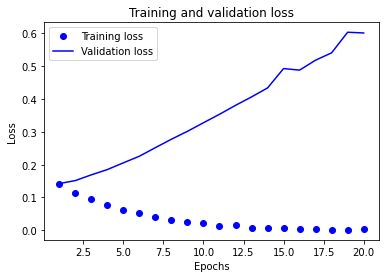

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
#“bo” is for “blue dot.”
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
#“b” is for “solid blue line.”
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

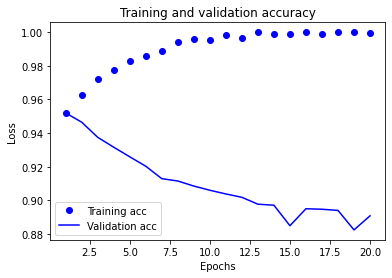

In [ ]:
plt.clf() #Clears the figure
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()